'gender' : Sexo del estudiante

'parental level of education': Nivel educativo de los padres

'lunch': Si tiene becas comedor

'test preparation course': Asiste a academia

'math score': Puntuación en Mates

'reading score': Comprensión Lectora

'writing score': Puntuación de escritura

En este reto tendrás que predecir si los resultados académicos del alumno están influenciados por el nivel educativo de los padres. Estos tienen un número que representa el siguiente nivel educativo:

high school: 0,

some high school: 1,

some college: 2,

associate's degree: 3,

bachelor's degree: 4,

master's degree: 5


habria que cambiar los numeros de los niveles educativos:
- 0: some high school
- 1: high school
- 2: some college
- 3: associate's degree
- 4: bachelor's degree
- 5: master's degree

clasificacion multiclases

# imports

Librerías

In [4]:
pip install tensorflow[and-cuda]


Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of tensorflow[and-cuda] to determine which version is compatible with other requirements. This could take a while.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nvidia-nccl-cu12==2.19.3; extra == "and-cuda" (from tensorflow[and-cuda]) (from versions: 0.0.1.dev5)
ERROR: No matching distribution found for nvidia-nccl-cu12==2.19.3; extra == "and-cuda"


In [3]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 469.7 kB/s eta 0:03:33
   ---------------------------------------- 0.4/99.8 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 1.2/99.8 MB 5.7 MB/s eta 0:00:18
    --------------------------------------- 1.3/99.8 MB 5.5 MB/s eta 0:00:18
    --------------------------------------- 1.5/99.8 MB 5.0 MB/s eta 0:00:20
    --------------------------------------- 1.8/99.8 MB 5.2 MB/s eta 0:00:19
   - -------------------------------------- 3.3/99.8 MB 8.6 MB/s eta 0:00:12
   - -------------------------------------- 4.6/99.8 MB 10.9 MB/s eta 0:00:09
   - -------------------------------------- 4.6/99.8 MB 10.9 MB/s eta 0:00:09
   - ----------

In [2]:

pip install catboost

SyntaxError: invalid syntax (2078486733.py, line 1)

In [1]:
# cálculos
import numpy as np
import pandas as pd

# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from numpy import random
random.seed(42)

ModuleNotFoundError: No module named 'xgboost'

datos

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df_entrenar = pd.read_csv("/content/drive/MyDrive/TIC/Data science/Master Data Science Nuclio - profesor/Aprendizaje supervisado - Presencial/Ejercicios/Clasificación multiclase/entrenar.csv")
df_predecir = pd.read_csv("/content/drive/MyDrive/TIC/Data science/Master Data Science Nuclio - profesor/Aprendizaje supervisado - Presencial/Ejercicios/Clasificación multiclase/predecir.csv")

# comprehensión

In [15]:
df_entrenar

,Unnamed: 0,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,764,female,1,standard,none,62,76,67
1,866,male,4,standard,none,79,57,58
2,208,female,2,standard,none,77,86,84
3,337,female,0,free/reduced,none,45,46,49
4,323,male,3,standard,completed,82,83,85
...,...,...,...,...,...,...,...,...
795,272,male,0,standard,completed,74,71,65
796,853,male,2,standard,completed,72,72,72
797,894,male,3,standard,none,86,77,78
798,179,male,0,standard,completed,89,87,86


In [16]:
df_predecir

,Unnamed: 0,gender,lunch,test preparation course,math score,reading score,writing score
0,79,male,standard,none,54,43,45
1,277,female,standard,none,72,77,77
2,855,female,standard,none,87,97,100
3,922,male,standard,none,55,55,55
4,332,male,standard,none,56,54,43
...,...,...,...,...,...,...,...
195,299,male,standard,none,47,43,39
196,675,male,standard,none,75,69,65
197,117,male,standard,completed,59,57,55
198,715,male,standard,none,73,66,59


In [17]:
# eliminamos la columna Unnamed: 0
df_entrenar.drop('Unnamed: 0', axis=1, inplace=True)
df_predecir.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
# cambiamos el nombre de las columanas para que sea más fácil usarlas
columnas = df_entrenar.columns.str.replace(" ","_")
df_entrenar.columns = columnas
columnas = df_predecir.columns.str.replace(" ","_")
df_predecir.columns = columnas

In [19]:
df_entrenar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       800 non-null    object
 1   parental_level_of_education  800 non-null    int64 
 2   lunch                        800 non-null    object
 3   test_preparation_course      800 non-null    object
 4   math_score                   800 non-null    int64 
 5   reading_score                800 non-null    int64 
 6   writing_score                800 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 43.9+ KB


In [20]:
df_entrenar.nunique()

gender                          2
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     77
reading_score                  73
writing_score                  76
dtype: int64

In [21]:
df_entrenar['gender'].unique()

array(['female', 'male'], dtype=object)

In [22]:
df_entrenar['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [23]:
df_entrenar['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [24]:
df_entrenar['parental_level_of_education'].unique()

array([1, 4, 2, 0, 3, 5])

In [25]:
df_entrenar.isnull().sum()

gender                         0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [26]:
df_predecir.isnull().sum()

gender                     0
lunch                      0
test_preparation_course    0
math_score                 0
reading_score              0
writing_score              0
dtype: int64

# análisis exploratorio

In [27]:
df_entrenar.head()

,gender,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,1,standard,none,62,76,67
1,male,4,standard,none,79,57,58
2,female,2,standard,none,77,86,84
3,female,0,free/reduced,none,45,46,49
4,male,3,standard,completed,82,83,85


In [28]:
# cambio de las etiquetas 0 y 1 para tener un orden en el nivel de education
# "some high school" 1 es más bajo que "high school" 0. Lo intercamiamos
dict = {
    0: 1,
    1: 0,
    2: 2,
    3: 3,
    4: 4,
    5: 5
}

df_entrenar['parental_level_of_education'] = df_entrenar['parental_level_of_education'].map(dict)

# otra forma
# df_entrenar['parental_level_of_education'] = df_entrenar['parental_level_of_education'].apply(lambda x: 0 if x == 1
#                                                                                                         else (1 if x == 0 else x))

In [29]:
df_entrenar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       800 non-null    object
 1   parental_level_of_education  800 non-null    int64 
 2   lunch                        800 non-null    object
 3   test_preparation_course      800 non-null    object
 4   math_score                   800 non-null    int64 
 5   reading_score                800 non-null    int64 
 6   writing_score                800 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 43.9+ KB


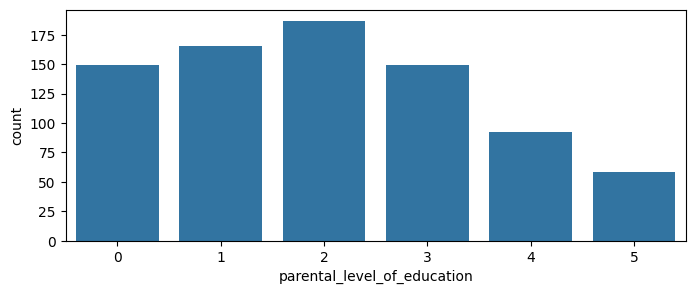

In [30]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.countplot(data=df_entrenar, x='parental_level_of_education')
plt.show()

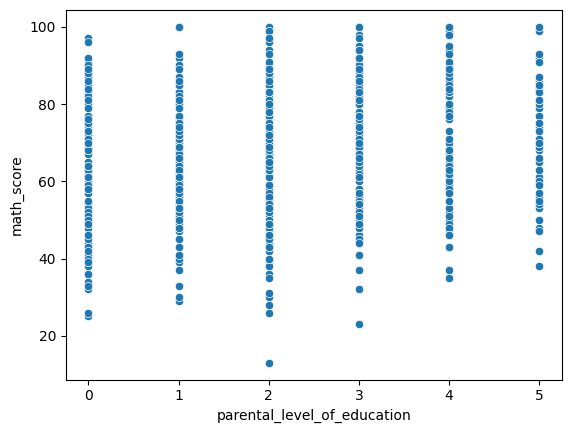

In [31]:
sns.scatterplot(data=df_entrenar, x='parental_level_of_education', y='math_score')
plt.show()

In [32]:
# jittering: agregar un pequeño valor aleatorio a los datos categóricos para dispersarlos, transformandolos en una variable continúa.
# usar solo para los gráficos!
df_entrenar['target_jittered'] = np.random.normal(df_entrenar['parental_level_of_education'], scale=0.3)

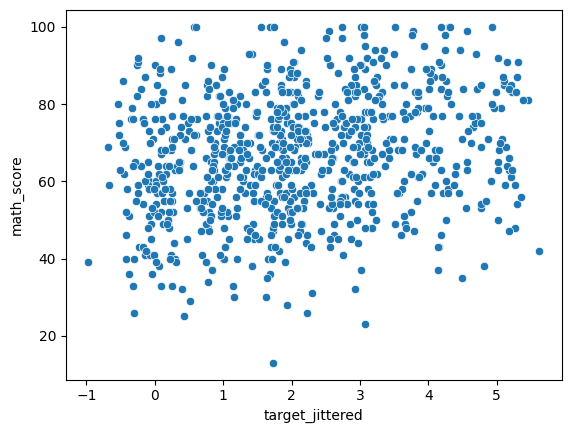

In [33]:
sns.scatterplot(data=df_entrenar, x='target_jittered', y='math_score')
plt.show()

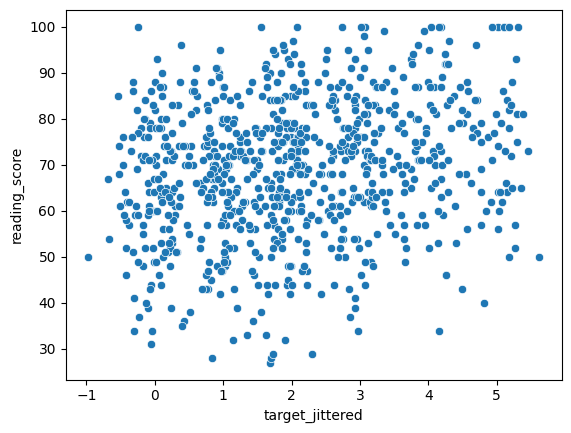

In [34]:
sns.scatterplot(data=df_entrenar, x='target_jittered', y='reading_score')
plt.show()

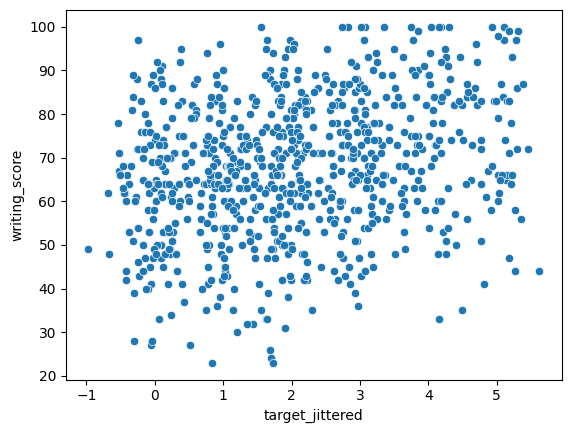

In [35]:
sns.scatterplot(data=df_entrenar, x='target_jittered', y='writing_score')
plt.show()

In [36]:
df_entrenar.drop('target_jittered', axis=1, inplace=True)

# preprocessing

In [37]:
# nulos
df_entrenar.isnull().sum()

gender                         0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [38]:
# one hot encoding
df_entrenar = pd.get_dummies(df_entrenar)
df_predecir = pd.get_dummies(df_predecir)

In [39]:
df_entrenar

,parental_level_of_education,math_score,reading_score,writing_score,gender_female,gender_male,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,0,62,76,67,True,False,False,True,False,True
1,4,79,57,58,False,True,False,True,False,True
2,2,77,86,84,True,False,False,True,False,True
3,1,45,46,49,True,False,True,False,False,True
4,3,82,83,85,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
795,1,74,71,65,False,True,False,True,True,False
796,2,72,72,72,False,True,False,True,True,False
797,3,86,77,78,False,True,False,True,False,True
798,1,89,87,86,False,True,False,True,True,False


In [40]:
# eliminamos las variables sobrantes: una de cada 2 que se han creado de las variables con 2 categorías
df_entrenar.drop(['gender_male', 'lunch_standard', 'test_preparation_course_none'], axis=1, inplace=True)
df_predecir.drop(['gender_male', 'lunch_standard', 'test_preparation_course_none'], axis=1, inplace=True)

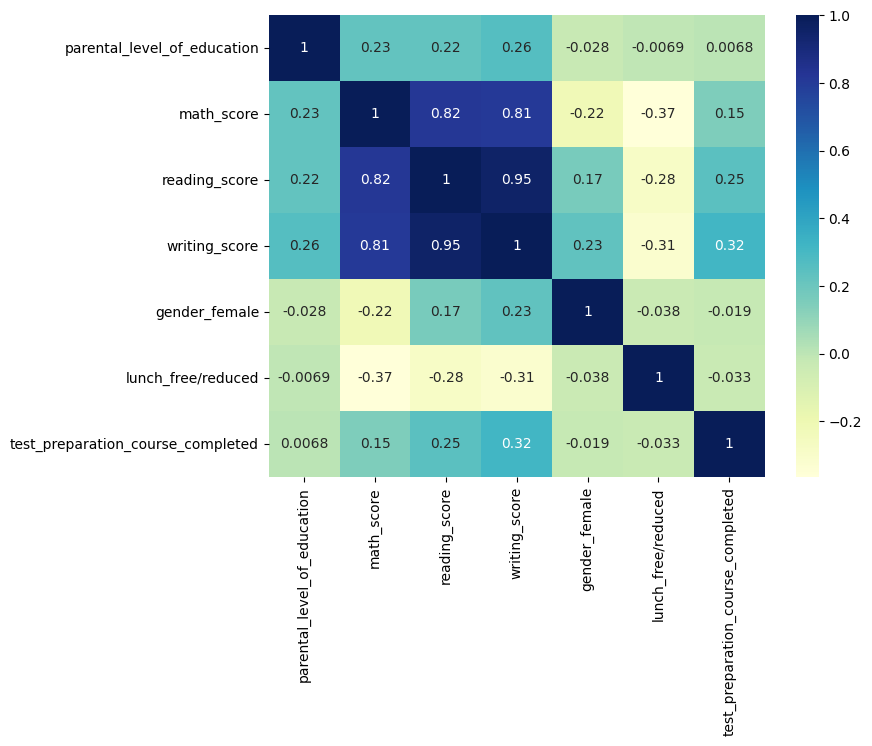

In [41]:
plt.rcParams['figure.figsize'] = 8, 6
sns.heatmap(df_entrenar.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [42]:
# eliminamos reading_score por tener una correlación muy alta con writing_score y porque aporta menos información que writing_score (menos correlación con la target)
df_entrenar.drop(['reading_score'], axis=1, inplace=True)
df_predecir.drop(['reading_score'], axis=1, inplace=True)

<ipython-input-43-6e0f41cb5abc>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')


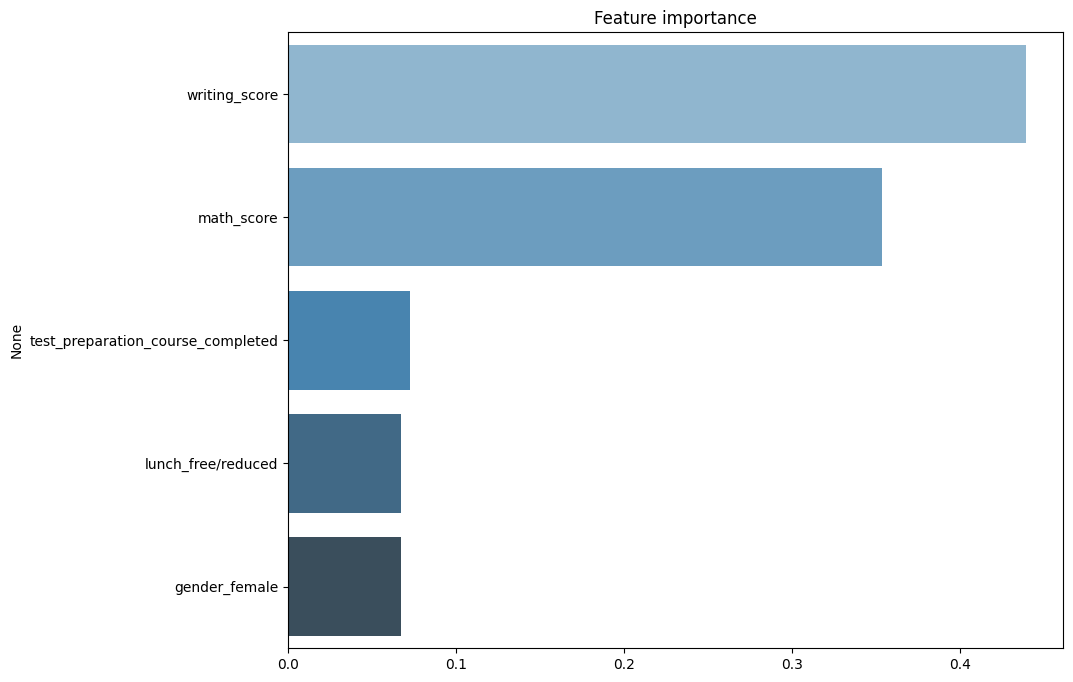

In [43]:
#feature importance
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}
# se entrena un RandomForest y se plotean las variables que tuvieron más importancia en el modelo
y = df_entrenar['parental_level_of_education']
x = df_entrenar.drop('parental_level_of_education' ,axis=1)
# entrena un RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plotea las 10 mejores Features importances
features = clf.feature_importances_[:10]
columnas = x.columns[:10]
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')
plt.show()

# modelo

## split train/test

In [44]:
# se guarda un 30% de datos para el test y un 70% para el train
y = df_entrenar['parental_level_of_education']
X = df_entrenar.drop('parental_level_of_education', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## estandarización

In [45]:
# se estandarizan las variables para evitar sesgo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # estandariza y define la regla de estandarización
X_test = scaler.transform(X_test)         # estandariza según la regla definida con el X_train

# se estandarizan las variables del dataset a predecir según la regla definida con el X_train
X_predecir = scaler.transform(df_predecir)

In [46]:
X_train.shape

(560, 5)

In [47]:
f1s = pd.DataFrame(columns=['modelo', 'f1_score'])
f1s

,modelo,f1_score


## clasificación multiclase

In [48]:
# añadimos en una lista los modelos que queremos poner a competir

modelos = []
modelos.append(('SVC', SVC()))
modelos.append(('LogisticRegression', LogisticRegression()))
modelos.append(('RidgeClassifier', RidgeClassifier()))
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('RandomForestClassifier', RandomForestClassifier()))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
modelos.append(('XGBClassifier', XGBClassifier()))
modelos.append(('CatBoostClassifier', CatBoostClassifier(verbose=False)))

In [49]:
for nombre, modelo in modelos:
  # entrenamiento
  modelo.fit(X_train, y_train)

  # predicción del test
  y_pred = modelo.predict(X_test)

  # evalua la metrica
  f1_score = metrics.f1_score(y_test, y_pred, average='macro')

  # añade la métrica al dataframe de métricas
  metrica = pd.DataFrame({'modelo':[nombre], 'f1_score':[f1_score]})

  print(nombre, np.round(f1_score,5))

  f1s = pd.concat([f1s,metrica], ignore_index=True)

SVC 0.16335
LogisticRegression 0.20686
RidgeClassifier 0.1965
DecisionTreeClassifier 0.20545
RandomForestClassifier 0.19275
GradientBoostingClassifier 0.16028
XGBClassifier 0.2275
CatBoostClassifier 0.19001


In [50]:
f1s.sort_values('f1_score', ascending= False)

,modelo,f1_score
6,XGBClassifier,0.227501
1,LogisticRegression,0.206864
3,DecisionTreeClassifier,0.205452
2,RidgeClassifier,0.196502
4,RandomForestClassifier,0.192750
7,CatBoostClassifier,0.190005
0,SVC,0.163345
5,GradientBoostingClassifier,0.160278


## regresión

In [51]:
# añadimos en una lista los modelos que queremos poner a competir

modelos = []
modelos.append(('LinearRegression', LinearRegression()))
modelos.append(('Lasso', Lasso()))
modelos.append(('Ridge', Ridge()))
modelos.append(('ElasticNet', ElasticNet()))
modelos.append(('SGDRegressor', SGDRegressor()))
modelos.append(('SVC', SVC()))
modelos.append(('RandomForestRegressor', RandomForestRegressor()))
modelos.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
modelos.append(('XGBRegressor', XGBRegressor(objective ='reg:squarederror')))
modelos.append(('CatBoostRegressor', CatBoostRegressor(verbose=False)))

In [52]:
for nombre, modelo in modelos:
  # entrenamiento
  modelo.fit(X_train, y_train)

  # predicción del test
  y_pred = modelo.predict(X_test)

  # pasamos las predicciones dataframe
  df_pred = pd.DataFrame(y_pred, columns=['prediccion'])

  # redeondeamos las predicciones
  df_pred['prediccion'] = round(df_pred['prediccion'], 0)

  # cambiamos los valores extremos
  df_pred['prediccion'] = df_pred['prediccion'].apply(lambda x: 0 if x < 0
                                                                else (5 if x > 5
                                                                      else int(x)))

  # evalua la metrica
  f1_score = metrics.f1_score(y_test, df_pred['prediccion'], average='macro')

  # añade la métrica al dataframe de métricas
  metrica = pd.DataFrame({'modelo':[nombre], 'f1_score':[f1_score]})

  print(nombre, np.round(f1_score,5))

  f1s = pd.concat([f1s,metrica], ignore_index=True)

LinearRegression 0.15435
Lasso 0.07692
Ridge 0.1545
ElasticNet 0.07692
SGDRegressor 0.1399
SVC 0.16335
RandomForestRegressor 0.16809
GradientBoostingRegressor 0.16217
XGBRegressor 0.17772
CatBoostRegressor 0.20146


In [53]:
f1s.sort_values('f1_score', ascending= False)

,modelo,f1_score
6,XGBClassifier,0.227501
1,LogisticRegression,0.206864
3,DecisionTreeClassifier,0.205452
17,CatBoostRegressor,0.201459
2,RidgeClassifier,0.196502
4,RandomForestClassifier,0.192750
7,CatBoostClassifier,0.190005
16,XGBRegressor,0.177721
14,RandomForestRegressor,0.168087
13,SVC,0.163345


XGBClassifier	0.227501  
LogisticRegression	0.206864  
DecisionTreeClassifier	0.205452  
CatBoostRegressor	0.201459  
RidgeClassifier	0.196502  
RandomForestClassifier	0.192750  
CatBoostClassifier	0.190005  
XGBRegressor	0.177721  
RandomForestRegressor	0.168087  
SVC	0.163345  
SVC	0.163345  
GradientBoostingRegressor	0.162172  
GradientBoostingClassifier	0.160278  
Ridge	0.154498  
LinearRegression	0.154351  
SGDRegressor	0.139899  
ElasticNet	0.076923  
Lasso	0.076923  

# predicción

Usaremos el mejor modelo XGBClassifier

In [56]:
# definimos el modelo
modelo = XGBClassifier()

# entrenamiento
modelo.fit(X_train, y_train)

# predicción de las observaciones a predecir
y_pred = modelo.predict(X_predecir)

# añadimos la predicción al dataframe a predecir
df_predecir['prediccion'] = y_pred

# redeondeamos las predicciones
df_predecir['prediccion'] = round(df_predecir['prediccion'], 0)

# cambiamos los valores extremos
df_predecir['prediccion'] = df_predecir['prediccion'].apply(lambda x: 0 if x < 0
                                                                      else (5 if x > 5
                                                                            else int(x)))

In [57]:
len (df_predecir)

200

In [58]:
df_predecir

,math_score,writing_score,gender_female,lunch_free/reduced,test_preparation_course_completed,prediccion
0,54,45,False,False,False,3
1,72,77,True,False,False,1
2,87,100,True,False,False,4
3,55,55,False,False,False,3
4,56,43,False,False,False,2
...,...,...,...,...,...,...
195,47,39,False,False,False,1
196,75,65,False,False,False,1
197,59,55,False,False,True,3
198,73,59,False,False,False,1
